In [83]:
# import some basic libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for scientific and statistical computing
import scipy as sp

# To make working with geospatial data in python easier
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

plt.style.use('ggplot')

# Load the dataset
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv",sep=",")

pd.set_option('display.max_columns', None)
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [84]:
#Get a sneak peek of our data
df.head()

VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            30.0   
1           Clean Alternative Fuel Vehicle Eligible           215.0   
2             Not eligible due to low battery range            15.0   
3           Clean Alternative Fuel Vehicle Eligible           215.0   
4           Clean Alternative Fuel Vehicle Eligible           150.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  35.0       267929112   
1        0.0                  23.0       475911439   
2        0.0                   1.0       101971278   
3        0.0                  23.0       474363746   
4        0.0                  45.0       476346482   

                  Vehicle Location  \
0  POINT (-122.8728334 47.5798304)   
1  POINT (-122.6368884 47.7469547)   
2    POINT (-122.206146 47.839957)   
3  POINT (-122.6231895 47.5930874)   
4      POINT (-122.13158 47.67858)   

                                Electric Utility  2020 Census Tract  
0                         PUGET SOUND ENERGY INC       5.303509e+10  
1                         PUGET SOUND ENERGY INC       5.303509e+10  
2                         PUGET SOUND ENERGY INC       5.306105e+10  
3                         PUGET SOUND ENERGY INC       5.303508e+10  
4  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10

In [3]:
#View the shape of the dataset
df.shape

(210165, 17)

In [85]:
#View the column names
df.columns.unique()

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

In [87]:
cols = df.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} nos of unique values in {} column out of {}'.format(df[cols[i]].nunique(), cols[i], len(df)))
Unique_Values()


There are 12377 nos of unique values in VIN (1-10) column out of 210165
There are 203 nos of unique values in County column out of 210165
There are 758 nos of unique values in City column out of 210165
There are 47 nos of unique values in State column out of 210165
There are 931 nos of unique values in Postal Code column out of 210165
There are 21 nos of unique values in Model Year column out of 210165
There are 43 nos of unique values in Make column out of 210165
There are 153 nos of unique values in Model column out of 210165
There are 2 nos of unique values in Electric Vehicle Type column out of 210165
There are 3 nos of unique values in Clean Alternative Fuel Vehicle (CAFV) Eligibility column out of 210165
There are 105 nos of unique values in Electric Range column out of 210165
There are 31 nos of unique values in Base MSRP column out of 210165
There are 49 nos of unique values in Legislative District column out of 210165
There are 210165 nos of unique values in DOL Vehicle ID col

                      Missing Values  Percentage
County                             4    0.001903
City                               4    0.001903
Postal Code                        4    0.001903
Electric Range                     5    0.002379
Base MSRP                          5    0.002379
Legislative District             445    0.211738
Vehicle Location                  10    0.004758
Electric Utility                   4    0.001903
2020 Census Tract                  4    0.001903


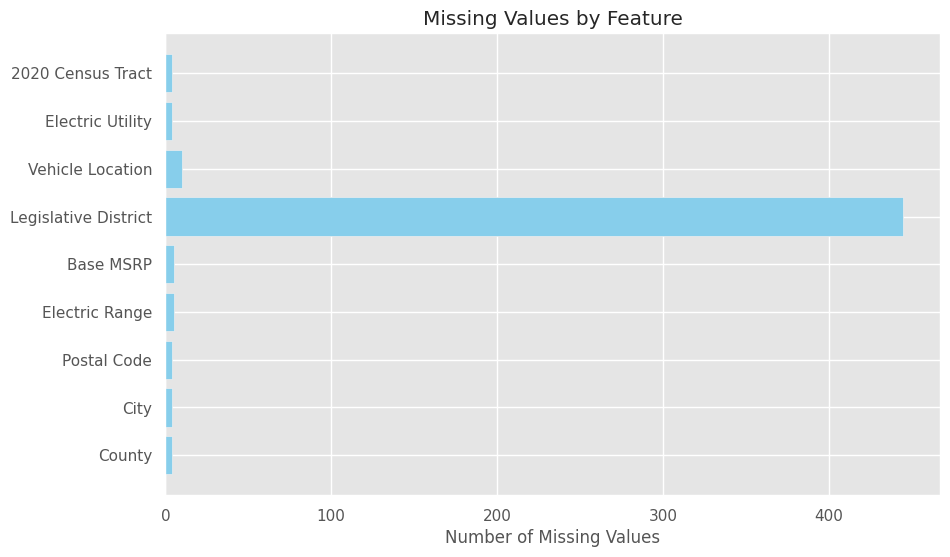

In [88]:
#Part1
# Check for missing values and document their frequency
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to store missing information
missing_info = pd.DataFrame({ 'Missing Values': missing_values,'Percentage': missing_percentage})

# Filter out columns with no missing values
missing_info_filtered = missing_info[missing_info['Missing Values'] > 0]

# Display the missing values
print(missing_info_filtered)

# Plot the missing values
plt.figure(figsize=(10,6))
plt.barh(missing_info_filtered.index, missing_info_filtered['Missing Values'], color='skyblue')
plt.xlabel('Number of Missing Values')
plt.title('Missing Values by Feature')
plt.show()

In [89]:
#the records with missing values
df[df.isnull().any(axis=1)]

VIN (1-10)          County        City State  Postal Code  Model Year  \
7440    WP1BM2AY4R            King    Kirkland    WA      98033.0        2024   
23186   WP1BM2AY1R            King     Seattle    WA      98108.0        2024   
40238   1GKB0RDCXR          Macomb      Warren    MI      48092.0        2024   
45209   1GKB0RDC0R          Macomb      Warren    MI      48092.0        2024   
53795   JTMAB3FV4N            Polk       Salem    OR      97304.0        2022   
...            ...             ...         ...   ...          ...         ...   
209613  2C4RC1S71M       San Diego     La Mesa    CA      91942.0        2021   
209898  JTMAB3FV2M        Muscogee    Columbus    GA      31907.0        2021   
209946  5YJYGDEE2M  San Bernardino  Fort Irwin    CA      92310.0        2021   
210118  7SAYGAEE5P       San Mateo    Atherton    CA      94027.0        2023   
210140  1G1RD6E4XE  Prince William    Manassas    VA      20111.0        2014   

             Make          Model                   Electric Vehicle Type  \
7440      PORSCHE        CAYENNE  Plug-in Hybrid Electric Vehicle (PHEV)   
23186     PORSCHE        CAYENNE  Plug-in Hybrid Electric Vehicle (PHEV)   
40238         GMC  HUMMER EV SUV          Battery Electric Vehicle (BEV)   
45209         GMC  HUMMER EV SUV          Battery Electric Vehicle (BEV)   
53795      TOYOTA     RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
...           ...            ...                                     ...   
209613   CHRYSLER       PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
209898     TOYOTA     RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
209946      TESLA        MODEL Y          Battery Electric Vehicle (BEV)   
210118      TESLA        MODEL Y          Battery Electric Vehicle (BEV)   
210140  CHEVROLET           VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
7440              Clean Alternative Fuel Vehicle Eligible             NaN   
23186             Clean Alternative Fuel Vehicle Eligible             NaN   
40238   Eligibility unknown as battery range has not b...             0.0   
45209   Eligibility unknown as battery range has not b...             0.0   
53795             Clean Alternative Fuel Vehicle Eligible            42.0   
...                                                   ...             ...   
209613            Clean Alternative Fuel Vehicle Eligible            32.0   
209898            Clean Alternative Fuel Vehicle Eligible            42.0   
209946  Eligibility unknown as battery range has not b...             0.0   
210118  Eligibility unknown as battery range has not b...             0.0   
210140            Clean Alternative Fuel Vehicle Eligible            38.0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
7440          NaN                  45.0       270889363   
23186         NaN                  11.0       272220189   
40238         0.0                   NaN       273369309   
45209         0.0                   NaN       269827470   
53795         0.0                   NaN       218086949   
...           ...                   ...             ...   
209613        0.0                   NaN       262847308   
209898        0.0                   NaN       208633246   
209946        0.0                   NaN       142870444   
210118        0.0                   NaN       228732409   
210140        0.0                   NaN       217175514   

                       Vehicle Location  \
7440     POINT (-122.1925969 47.676241)   
23186   POINT (-122.3173531 47.5484673)   
40238      POINT (-83.064593 42.512487)   
45209      POINT (-83.064593 42.512487)   
53795   POINT (-123.0771613 44.9631335)   
...                                 ...   
209613  POINT (-117.0230197 32.7779798)   
209898     POINT (-84.902073 32.485872)   
209946  POINT (-116.6984466 35.2618843)   
210118  POINT (-122.1941982 37.4534418)   
210140       PO

In [90]:
#Part2
#  Drop rows with missing values
df_dropped = df.dropna()
print("\nAfter Dropping Rows with Missing Values:")
print("Shape of original data:", df.shape)
print("Shape after dropping rows:", df_dropped.shape)



After Dropping Rows with Missing Values:
Shape of original data: (210165, 17)
Shape after dropping rows: (209709, 17)


In [91]:
#Part2
df['Electric Utility'] = df['Electric Utility'].fillna('Utility Not Avalilable')


df['Legislative District'] = df['Legislative District'].fillna('Unknown')


df['Vehicle Location'] = df['Vehicle Location'].fillna('Unknown')

model_mode = df['Model'].mode()
df['Model'] = df['Model'].fillna('model_mode')


df['2020 Census Tract'] = df['2020 Census Tract'].fillna('Unknown')

df['Electric Range'] = df['Electric Range'].fillna('Unknown')

df['Base MSRP'] = df['Base MSRP'].fillna(value=df['Base MSRP'].fillna('Unknown'))

city_mode = df['City'].mode()
df['City'] = df['City'].fillna('city_mode')

# fill null values in the 'Postal Code' column with the mean salary
mean_postcode = df['Postal Code'].mean()
df['Postal Code'] = df['Postal Code'].fillna(mean_postcode)

county_mode = df['County'].mode()
df['County'] = df['County'].fillna('county_mode')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210165 non-null  object 
 2   City                                               210165 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210165 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

In [92]:
# have a view of refreshed dataset again
df.isnull().sum().sort_values(ascending = False)

VIN (1-10)                                           0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Utility                                     0
Vehicle Location                                     0
DOL Vehicle ID                                       0
Legislative District                                 0
Base MSRP                                            0
Electric Range                                       0
Electric Vehicle Type                                0
County                                               0
Model                                                0
Make                                                 0
Model Year                                           0
Postal Code                                          0
State                                                0
City                                                 0
2020 Census Tract                                    0
dtype: int64

In [93]:
#part 3 - a
# Encode categorical variables using One-Hot Encoding
categorical_columns = ['Make', 'Model', 'Electric Vehicle Type', 'City', 'State', 'County', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the new shape after encoding
print("Shape of the dataset after One-Hot Encoding:", df_encoded.shape)
df_encoded.head()


Shape of the dataset after One-Hot Encoding: (210165, 1287)


VIN (1-10)  Postal Code  Model Year Electric Range Base MSRP  \
0  5UXTA6C0XM      98380.0        2021           30.0       0.0   
1  5YJ3E1EB1J      98370.0        2018          215.0       0.0   
2  WP0AD2A73G      98012.0        2016           15.0       0.0   
3  5YJ3E1EB5J      98310.0        2018          215.0       0.0   
4  1N4AZ1CP3K      98052.0        2019          150.0       0.0   

  Legislative District  DOL Vehicle ID                 Vehicle Location  \
0                 35.0       267929112  POINT (-122.8728334 47.5798304)   
1                 23.0       475911439  POINT (-122.6368884 47.7469547)   
2                  1.0       101971278    POINT (-122.206146 47.839957)   
3                 23.0       474363746  POINT (-122.6231895 47.5930874)   
4                 45.0       476346482      POINT (-122.13158 47.67858)   

  2020 Census Tract  Make_ALFA ROMEO  Make_AUDI  Make_AZURE DYNAMICS  \
0     53035091301.0            False      False                False   
1     53035091100.0            False      False                False   
2     53061052009.0            False      False                False   
3     53035080200.0            False      False                False   
4     53033032323.0            False      False                False   

   Make_BENTLEY  Make_BMW  Make_CADILLAC  Make_CHEVROLET  Make_CHRYSLER  \
0         False      True          False           False          False   
1         False     False          False           False          False   
2         False     False          False           False          False   
3         False     False          False           False          False   
4         False     False          False           False          False   

   Make_DODGE  Make_FIAT  Make_FISKER  Make_FORD  Make_GENESIS  Make_GMC  \
0       False      False        False      False         False     False   
1       False      False        False      False         False     False   
2       False      False        False      False         False     False   
3       False      False        False      False         False     False   
4       False      False        False      False         False     False   

   Make_HONDA  Make_HYUNDAI  Make_JAGUAR  Make_JEEP  Make_KIA  \
0       False         False        False      False     False   
1       False         False        False      False     False   
2       False         False        False      False     False   
3       False         False        False      False     False   
4       False         False        False      False     False   

   Make_LAND ROVER  Make_LEXUS  Make_LINCOLN  Make_LUCID  Make_MAZDA  \
0            False       False         False       False       False   
1            False       False         False       False       False   
2            False       False         False       False       False   
3            False       False         False       False       False   
4            False       False         False       False       False   

   Make_MERCEDES-BENZ  Make_MINI  Make_MITSUBISHI  Make_NISSAN  Make_POLESTAR  \
0               False      False            False        False          False   
1               False      False            False        False          False   
2               False      False            False        False          False   
3               False      False            False        False          False   
4               False      False            False         True          False   

   Make_PORSCHE  Make_RAM  Make_RIVIAN  Make_ROLLS-ROYCE  Make_SMART  \
0         False     False        False             False       False   
1         False     False        False             False       False   
2          True     False        False             False       False   
3         False     False        False             False       False   
4         False     False        False             False       False   

   Make_SUBARU  Make_TESLA  Make_TH!NK  Make_TOYOTA  Make_VINFAS

In [94]:
#Part 3 -b
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le  # Save encoder for potential inverse transform

# Display the shape and first few rows
print("Shape of the dataset after Label Encoding:", df_label_encoded.shape)
df_label_encoded.head()

Shape of the dataset after Label Encoding: (210165, 17)


VIN (1-10)  County  City  State  Postal Code  Model Year  Make  Model  \
0  5UXTA6C0XM      87   595     44      98380.0        2021     5    147   
1  5YJ3E1EB1J      87   524     44      98370.0        2018    36     88   
2  WP0AD2A73G     169    61     44      98012.0        2016    30    100   
3  5YJ3E1EB5J      87    64     44      98310.0        2018    36     88   
4  1N4AZ1CP3K      85   546     44      98052.0        2019    28     86   

   Electric Vehicle Type  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                      1                                                  0   
1                      0                                                  0   
2                      1                                                  2   
3                      0                                                  0   
4                      0                                                  0   

  Electric Range Base MSRP Legislative District  DOL Vehicle ID  \
0           30.0       0.0                 35.0       267929112   
1          215.0       0.0                 23.0       475911439   
2           15.0       0.0                  1.0       101971278   
3          215.0       0.0                 23.0       474363746   
4          150.0       0.0                 45.0       476346482   

                  Vehicle Location  Electric Utility 2020 Census Tract  
0  POINT (-122.8728334 47.5798304)                71     53035091301.0  
1  POINT (-122.6368884 47.7469547)                71     53035091100.0  
2    POINT (-122.206146 47.839957)                71     53061052009.0  
3  POINT (-122.6231895 47.5930874)                71     53035080200.0  
4      POINT (-122.13158 47.67858)                72     53033032323.0

In [96]:
#part4 -a
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize
numerical_columns = ['Base MSRP', 'Electric Range', 'Model Year', 'Postal Code', 'Legislative District']
# Replace 'Unknown' with NaN and then drop those rows
df_encoded[numerical_columns] = df_encoded[numerical_columns].replace('Unknown', np.nan)
df_encoded = df_encoded.dropna(subset=numerical_columns)

# Normalize the numerical columns
scaler = MinMaxScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the dataset to confirm normalization
print("Sample of normalized features:")
df_encoded[numerical_columns].head()


Sample of normalized features:


Base MSRP  Electric Range  Model Year  Postal Code  Legislative District
0        0.0        0.089021    0.846154     0.270328              0.708333
1        0.0        0.637982    0.730769     0.263195              0.458333
2        0.0        0.044510    0.653846     0.007846              0.000000
3        0.0        0.637982    0.730769     0.220399              0.458333
4        0.0        0.445104    0.769231     0.036377              0.916667

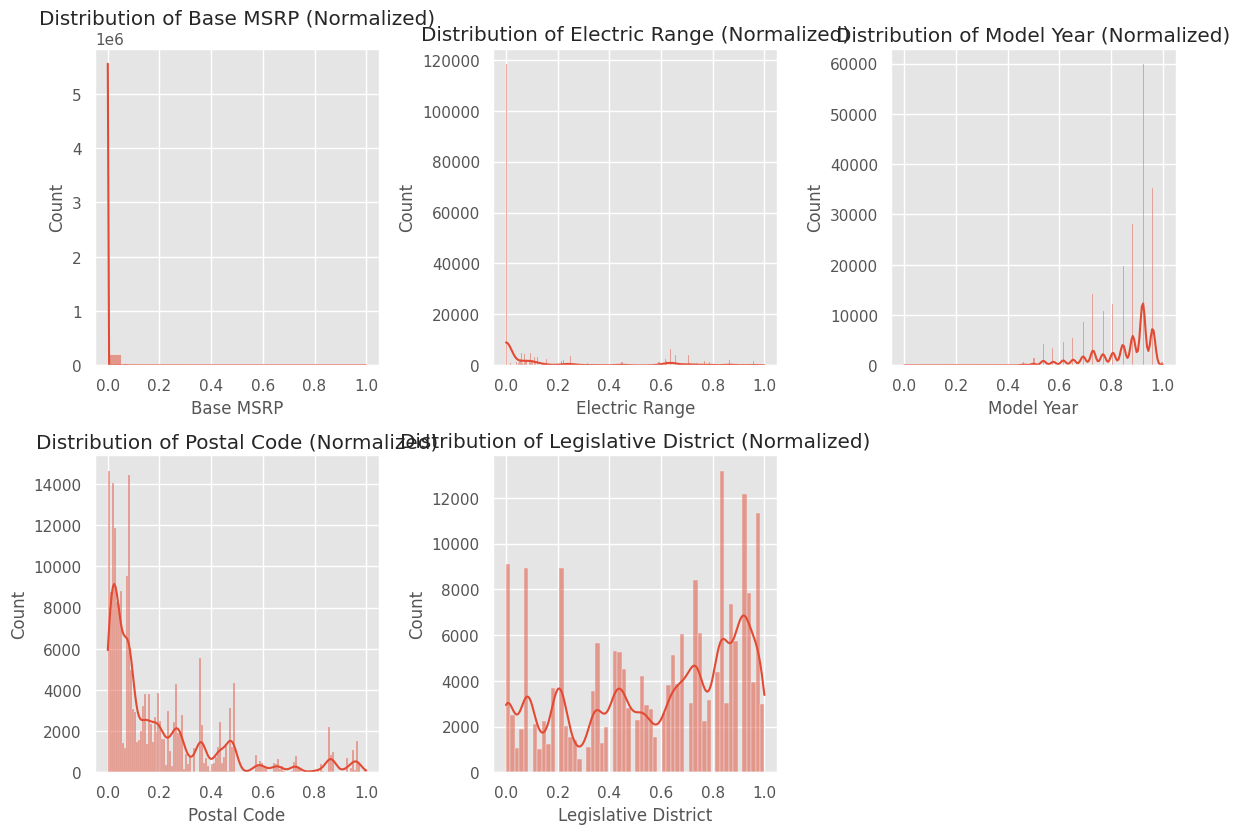

In [97]:
#Part4 -b
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each numerical column after normalization
plt.figure(figsize=(12, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col} (Normalized)')
plt.tight_layout()
plt.show()

In [98]:
#Part4 -c
from sklearn.preprocessing import StandardScaler

# Select numerical columns to standardize
numerical_columns = ['Base MSRP', 'Electric Range', 'Model Year', 'Postal Code', 'Legislative District']

# Replace 'Unknown' with NaN and then drop those rows
df_encoded[numerical_columns] = df_encoded[numerical_columns].replace('Unknown', np.nan)
df_encoded = df_encoded.dropna(subset=numerical_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the dataset to confirm standardization
print("Sample of standardized features:")
df_encoded[numerical_columns].head()


Sample of standardized features:


Base MSRP  Electric Range  Model Year  Postal Code  Legislative District
0  -0.117204       -0.236792   -0.016539     0.369959              0.407149
1  -0.117204        1.890633   -1.020128     0.337469             -0.397773
2  -0.117204       -0.409286   -1.689188    -0.825702             -1.873464
3  -0.117204        1.890633   -1.020128     0.142524             -0.397773
4  -0.117204        1.143160   -0.685598    -0.695738              1.077918

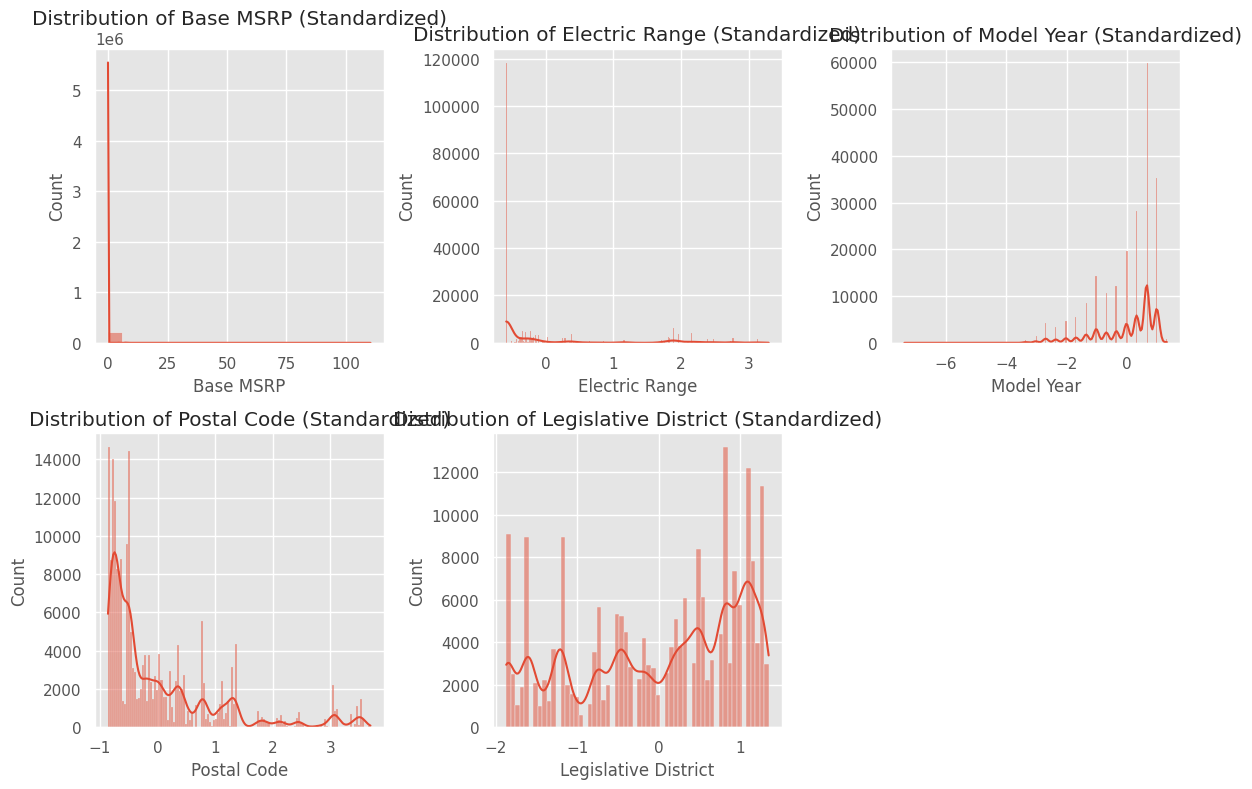

In [99]:
#Part4 -d
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each numerical column after standardization
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Arrange in a 2x3 grid for five columns
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col} (Standardized)')
plt.tight_layout()
plt.show()


In [100]:
#Part5
import pandas as pd

# Specify the columns of interest
columns_of_interest = ['Postal Code', 'Model Year', 'Electric Range', 'Legislative District', 'DOL Vehicle ID']

# Calculate basic descriptive statistics for the specified columns
# You can use include='all' if you want to see all types of data
desc_stats = df[columns_of_interest].describe(include='all')

# Calculate the median for each specified numerical column and add it to the desc_stats DataFrame
medians = df[columns_of_interest].median(numeric_only=True)  # Calculate median only for numeric columns
medians_df = pd.DataFrame(medians, columns=['median']).T  # Convert medians to a DataFrame and transpose

# Append the median row to the descriptive statistics DataFrame
desc_stats = pd.concat([desc_stats, medians_df])

# Apply a background gradient with 'cividis' colormap
styled_stats = desc_stats.style.background_gradient(cmap='cividis')

# Display the styled table
styled_stats

In [46]:
#Part 6
import pandas as pd
import folium
from folium.plugins import MarkerCluster



# Ensure the 'Vehicle Location' column is a string and extract longitude and latitude
df['Vehicle Location'] = df['Vehicle Location'].astype(str)

# Function to extract coordinates
def extract_coordinates(location):
    try:
        lon, lat = location.split('(')[1].replace(')', '').split()
        return float(lon), float(lat)
    except:
        return None, None

# Apply the extraction function to the 'Vehicle Location' column
df['Longitude'], df['Latitude'] = zip(*df['Vehicle Location'].apply(extract_coordinates))

# Filter out rows with missing coordinates
df_cleaned = df.dropna(subset=['Longitude', 'Latitude'])

# Sample the data to speed up the process
df_sampled = df_cleaned.sample(n=1000, random_state=42)

# Define a color mapping for different vehicle makes
color_mapping = {
    'Tesla': 'red',
    'Nissan': 'blue',
    'Chevrolet': 'green',
    'BMW': 'purple',
    'Audi': 'orange',
    'Other': 'gray'  # Default color for makes not explicitly listed
}

# Initialize a folium map, centered on Washington state
map_center = [47.7511, -120.7401]  # Latitude and Longitude of Washington state
ev_map = folium.Map(location=map_center, zoom_start=7)

# Add a marker cluster for better visualization
marker_cluster = MarkerCluster().add_to(ev_map)

# Add color-coded markers based on the 'Make' column
for index, row in df_sampled.iterrows():
    vehicle_make = row['Make']
    # Get the color based on the make, or assign 'gray' if not in the color_mapping
    marker_color = color_mapping.get(vehicle_make, 'gray')

    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"{row['Make']} {row['Model']} ({row['Model Year']})",
                  icon=folium.Icon(color=marker_color)
                  ).add_to(marker_cluster)

# Display the map in Jupyter
ev_map


Top 10 Most Popular EV Models:
 Model
MODEL Y           44038
MODEL 3           32520
LEAF              13606
MODEL S            7795
BOLT EV            6780
MODEL X            6239
VOLT               4815
ID.4               4716
MUSTANG MACH-E     4363
WRANGLER           4116
Name: count, dtype: int64


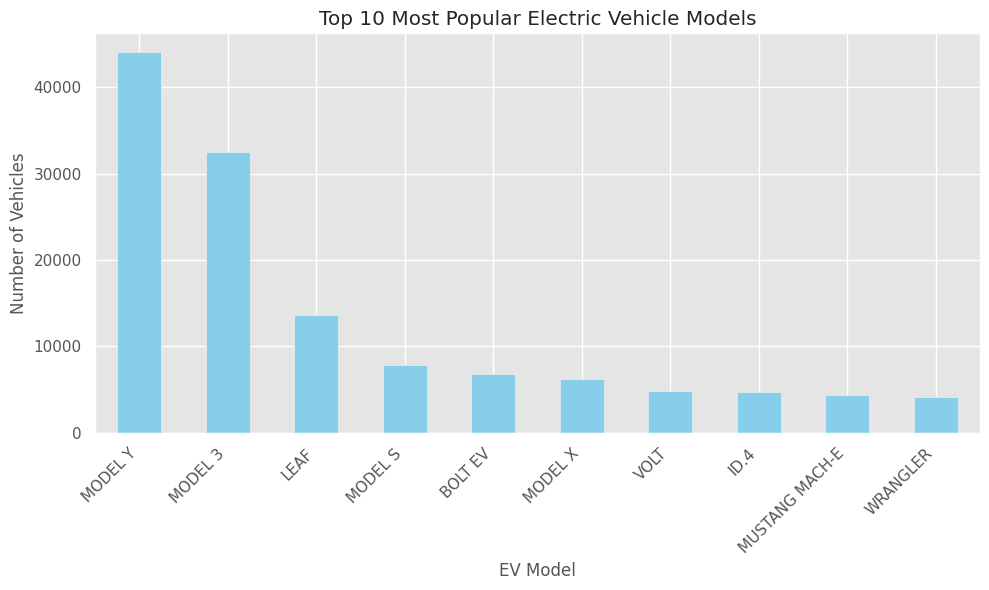

In [101]:
#Part7-a
# Analyzing the popularity of different EV models
model_popularity = df['Model'].value_counts()

# Display the top 10 most popular EV models
print("Top 10 Most Popular EV Models:\n", model_popularity.head(10))

# Plot the popularity of the top 10 most popular models
plt.figure(figsize=(10,6))
model_popularity.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Electric Vehicle Models')
plt.xlabel('EV Model')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 10 highest maximum Models')

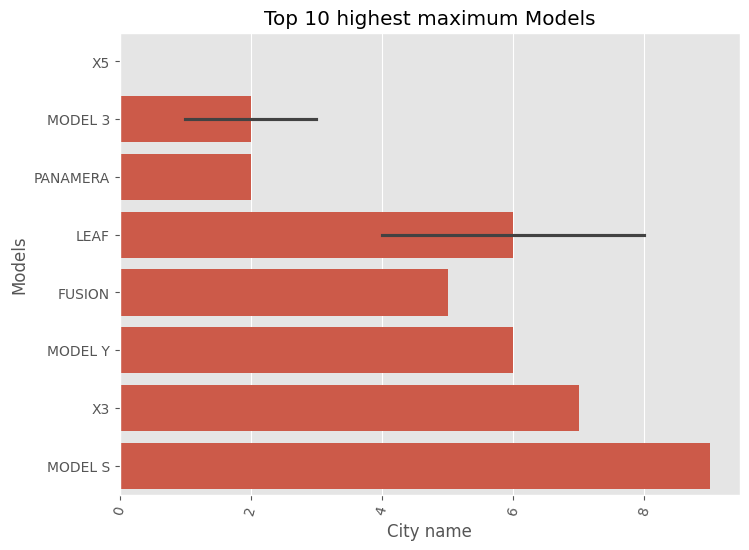

In [48]:
#Part 7-b
# to view the top models
top_Model=df.Model.value_counts()
top_Model[:10]
max_Model=df.groupby('City')['Model Year'].max().sort_values(ascending=False)
max_Model.head(10).index
#  ploting the top models
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
sns.barplot(y=df.Model.head(10),x=df.Model.head(10).index);
plt.xlabel( "City name")

# Set label for y-axis
plt.ylabel( "Models" )

# Set title for figure
plt.title( "Top 10 highest maximum Models" )

Text(0.5, 1.0, 'Bottom 5 Cars')

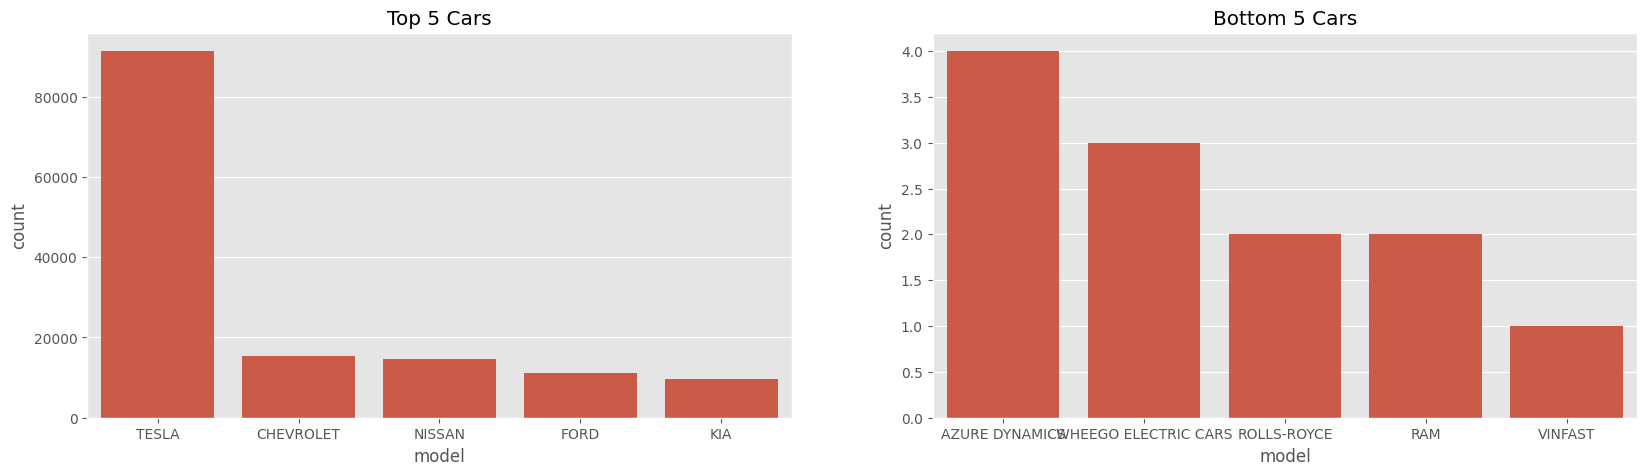

In [49]:
#Part 7-c
#the Top 5 vs Bottom 5 Comparison?
car_market_share = pd.DataFrame(df.groupby('Make')['VIN (1-10)'].count().reset_index()).sort_values(by='VIN (1-10)',ascending=False).reset_index(drop=True)
car_market_share.columns = ['model','count']
car_market_share_top_5 = car_market_share.head(5)
car_market_share_bottom_5 = car_market_share.tail(5)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(data=car_market_share_top_5, x="model", y="count",ax=axes[0])
sns.barplot(data=car_market_share_bottom_5, x="model", y="count",ax=axes[1])
axes[0].set_title('Top 5 Cars')
axes[1].set_title('Bottom 5 Cars')

In [52]:
#Part 7-d
import pandas as pd
import plotly.express as px

# Ensure 'Electric Range' is numeric, coercing errors to NaN
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')

# Drop rows with NaN in 'Electric Range'
df = df.dropna(subset=['Electric Range'])

# Calculate the average Electric Range per vehicle make
km_range = df.groupby('Make')['Electric Range'].mean().reset_index().sort_values(by='Electric Range', ascending=False).reset_index(drop=True).head(10)

# Rename columns for clarity in visualization
km_range.columns = ['Make', 'Average Electric Range (km)']

# Create a pie chart for the top 10 vehicle makes by average electric range
fig = px.pie(data_frame=km_range, names='Make', values='Average Electric Range (km)',
             hover_name='Make', title='Top 10 Vehicle Makes by Average Electric Range (km)', hole=0.4)

# Show the chart
fig.show()


In [53]:
#Part8-a
# Investigating the relationship between numeric features

numeric_features = df.select_dtypes(include=[np.number])

# Displaying the correlation matrix
correlation_matrix = numeric_features.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                 Postal Code  Model Year  Electric Range  DOL Vehicle ID  \
Postal Code        1.000000   -0.001292       -0.000800        0.005861   
Model Year        -0.001292    1.000000       -0.513534        0.215692   
Electric Range    -0.000800   -0.513534        1.000000       -0.140689   
DOL Vehicle ID     0.005861    0.215692       -0.140689        1.000000   
Longitude         -0.751863   -0.002453        0.000990       -0.001487   
Latitude           0.385764   -0.001386        0.003481       -0.009177   

                Longitude  Latitude  
Postal Code     -0.751863  0.385764  
Model Year      -0.002453 -0.001386  
Electric Range   0.000990  0.003481  
DOL Vehicle ID  -0.001487 -0.009177  
Longitude        1.000000 -0.375251  
Latitude        -0.375251  1.000000  


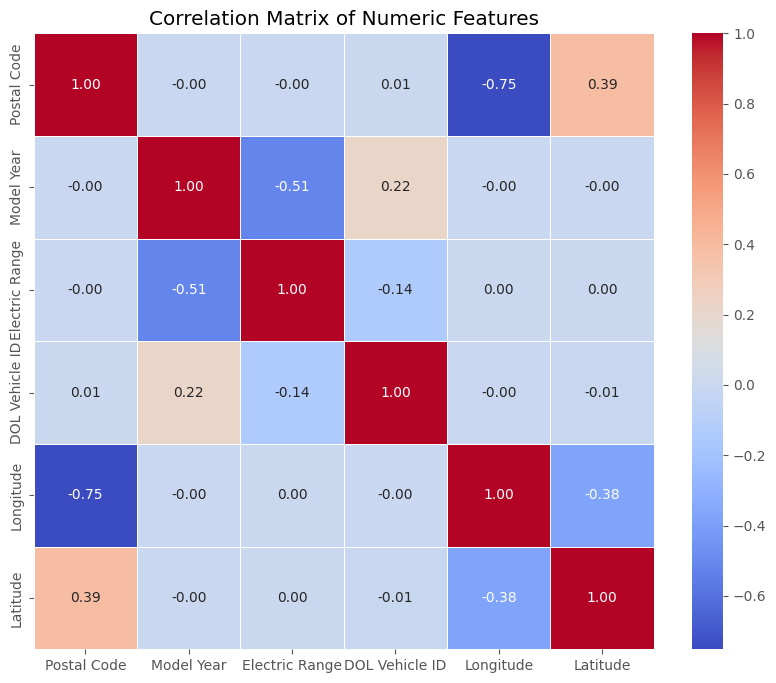

In [54]:
#Part8-b
# Plotting the correlation matrix using a heatmap for better visualization
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

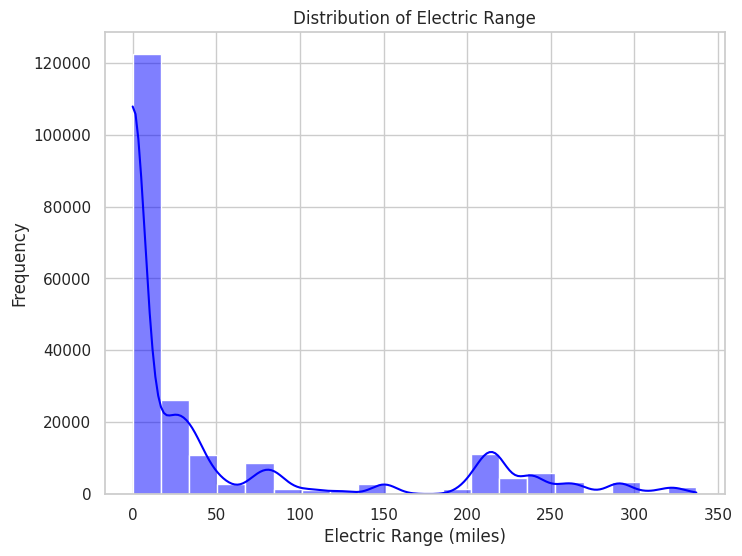

In [102]:
#Part9-a
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ensure numeric columns for relevant features
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Histogram: Distribution of 'Electric Range'
plt.figure(figsize=(8,6))
sns.histplot(df['Electric Range'], kde=True, bins=20, color='blue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

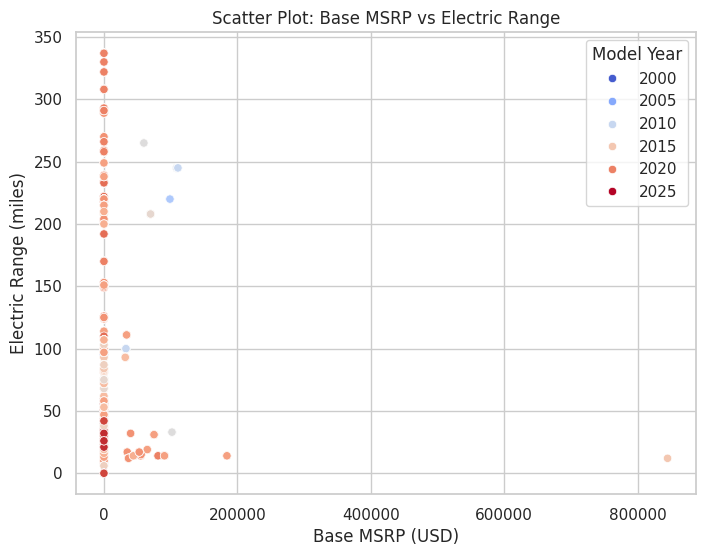

In [58]:
#Part9-b
# 2. Scatter Plot: Relationship between 'Base MSRP' and 'Electric Range'
plt.figure(figsize=(8,6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df, hue='Model Year', palette='coolwarm')
plt.title('Scatter Plot: Base MSRP vs Electric Range')
plt.xlabel('Base MSRP (USD)')
plt.ylabel('Electric Range (miles)')
plt.show()

Text(0, 0.5, 'Count')

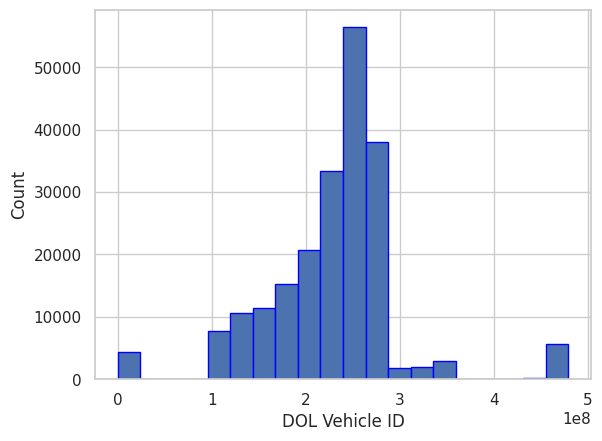

In [60]:
#Part9-c
#Histogram plot to check the normality and distribution of DOL Vehicle ID
plt.hist(df["DOL Vehicle ID"],bins=20, edgecolor='blue')
plt.xlabel("DOL Vehicle ID")
plt.ylabel("Count")

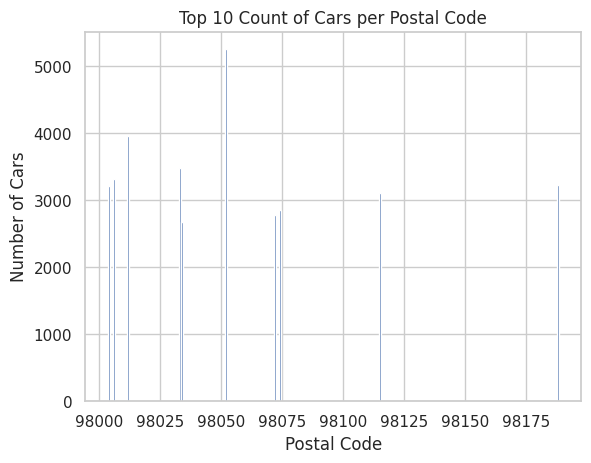

In [61]:
#Part9-d
#Plot showing Top 10 count of cars per postal code

car_counts_pc = df['Postal Code'].value_counts().nlargest(10)

# plot the counts with a logarithmic y-axis
plt.bar(car_counts_pc.index, car_counts_pc.values)
plt.xlabel('Postal Code')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per Postal Code')
plt.show()

car_counts_pc_df = car_counts_pc.to_frame()
car_counts_pc_df.style.background_gradient(cmap='Blues')

<Axes: ylabel='count'>

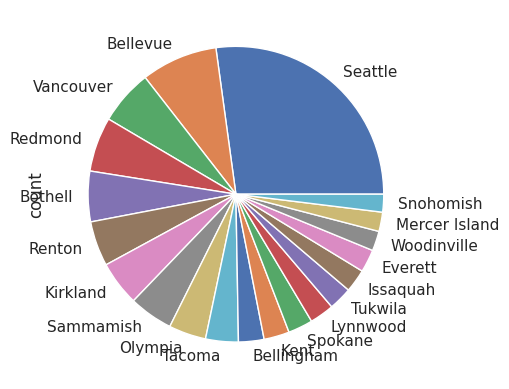

In [62]:
#Part9-e
City_df = pd.DataFrame(df.City[:20].value_counts().sort_index())
City_df
cities_by_Electric_Range=df.City.value_counts()
cities_by_Electric_Range
cities_by_Electric_Range[:20]
# To plot the cities by the Electric Range upto range 20
cities_by_Electric_Range[:20].plot(kind='pie')

In [63]:
# part9-f
import plotly.express as px
# ploting the top makes using histogram
fig = px.histogram(df,x='Make',marginal='box',color_discrete_sequence=['Green'],title='top makes')

fig.update_layout(bargap=0.3)
fig.show()

<Axes: xlabel='Electric Range', ylabel='Count'>

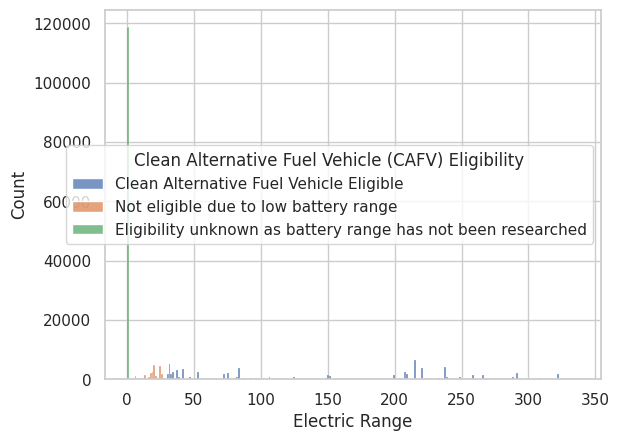

In [64]:
#Part9-g
# To view the Electric Range per CAFV Eligibility
sns.histplot(data=df, x="Electric Range", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", multiple="stack")


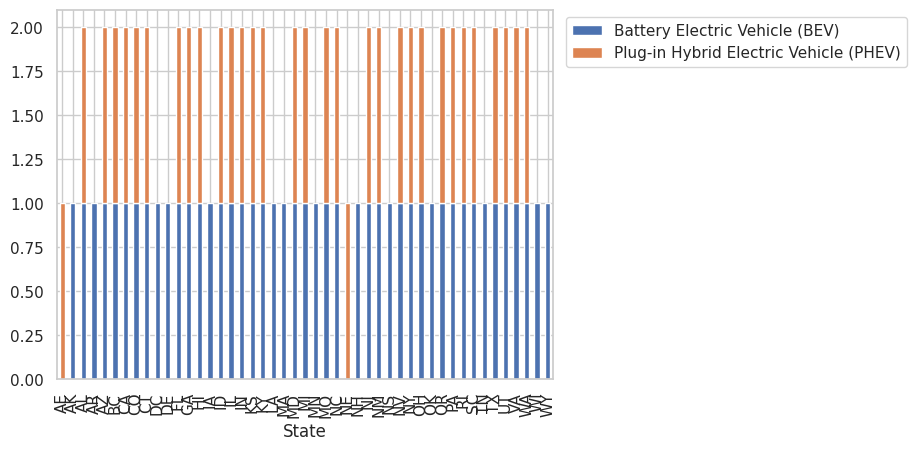

State                   Electric Vehicle Type  Count
9    CA          Battery Electric Vehicle (BEV)     84
2    AL          Battery Electric Vehicle (BEV)      7
5    AZ          Battery Electric Vehicle (BEV)      7
4    AR          Battery Electric Vehicle (BEV)      3
3    AL  Plug-in Hybrid Electric Vehicle (PHEV)      2
6    AZ  Plug-in Hybrid Electric Vehicle (PHEV)      2
0    AE  Plug-in Hybrid Electric Vehicle (PHEV)      1
1    AK          Battery Electric Vehicle (BEV)      1
7    BC          Battery Electric Vehicle (BEV)      1
8    BC  Plug-in Hybrid Electric Vehicle (PHEV)      1

In [65]:
#Part9-h
#
# EVT Distribution count per state
evt_Dis_cnt = df.groupby(['State', 'Electric Vehicle Type']).size().reset_index(name='Count')
evt_Dis_cnt.groupby(['State', 'Electric Vehicle Type'])['Count'].count().unstack().plot(kind='bar', stacked=True)

# Move legend outside of plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

evt_Dis_cnt.head(10).sort_values(by='Count', ascending=False)

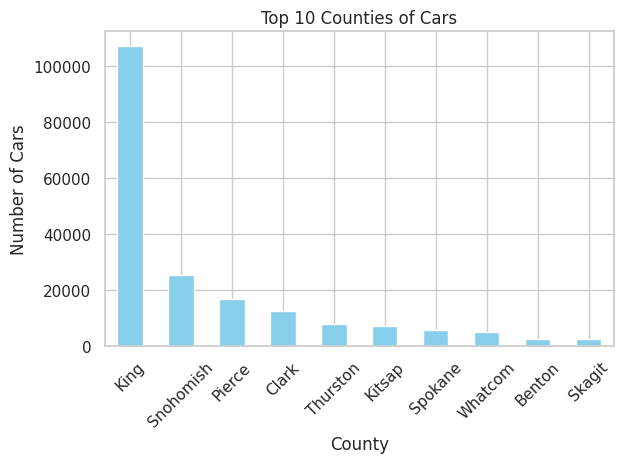

In [66]:
#Part10-a
import pandas as pd
import matplotlib.pyplot as plt

# Check if the 'County' column exists and contains data
if 'County' in df.columns and not df.empty:
    # Calculate the top 10 counts of cars per county
    car_counts = df['County'].value_counts().nlargest(10)

    # Ensure there are values to plot
    if not car_counts.empty:
        # Plot the counts
        car_counts.plot(kind='bar', color='skyblue')
        plt.title('Top 10 Counties of Cars')
        plt.xlabel('County')
        plt.ylabel('Number of Cars')
        plt.xticks(rotation=45)
        plt.tight_layout()  # Adjust layout to prevent clipping of labels
        plt.show()

        # Convert to DataFrame for styling
        car_counts_df = car_counts.to_frame()
        car_counts_df.style.background_gradient(cmap='Blues')
    else:
        print("No car counts available to plot.")
else:
    print("The 'County' column is missing or the DataFrame is empty.")

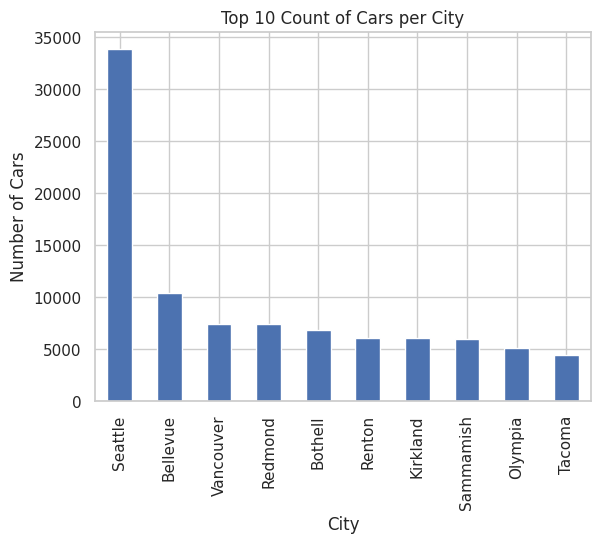

In [67]:
#Part10-b
#the Top 10 count of cars per city
car_counts_Cty = df['City'].value_counts().nlargest(10)

# plot the counts
car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per City')
plt.show()

car_counts_cty_df = car_counts_Cty.to_frame()
car_counts_cty_df.style.background_gradient(cmap='Blues')

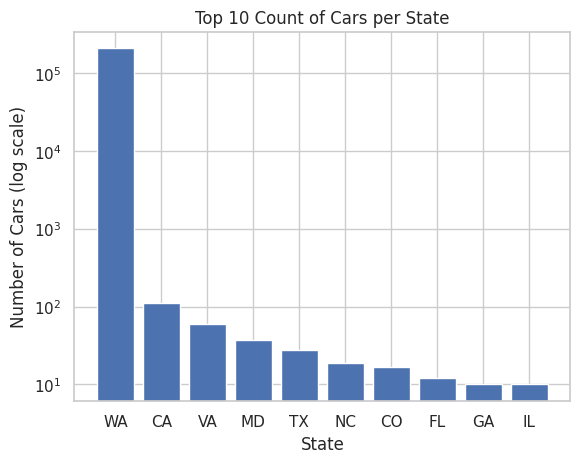

In [68]:
#Part 10-c
#the Top 10 count of cars per state
car_counts_St = df['State'].value_counts().nlargest(10)

# plot the counts with a logarithmic y-axis
plt.bar(car_counts_St.index, car_counts_St.values)
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars (log scale)')
plt.title('Top 10 Count of Cars per State')
plt.show()

car_counts_St_df = car_counts_St.to_frame()
car_counts_St_df.style.background_gradient(cmap='Blues')


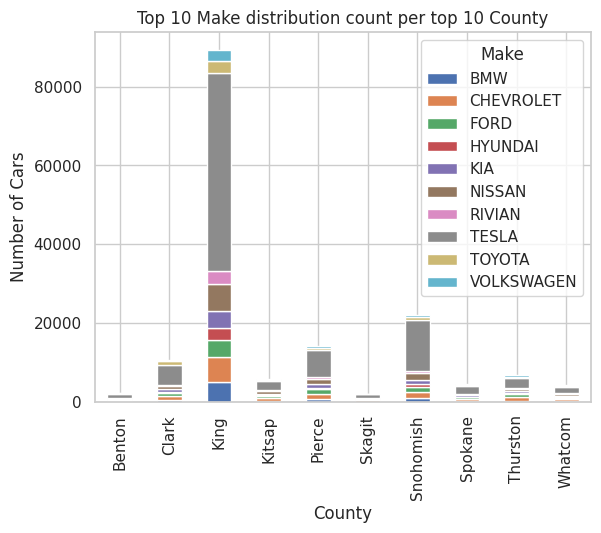

Make        BMW  CHEVROLET  FORD  HYUNDAI   KIA  NISSAN  RIVIAN  TESLA  \
County                                                                   
Benton      117        267   215       71   120     141      30   1068   
Clark       467        959   706      394   604     851     245   5164   
King       5101       6246  4203     3081  4287    7008    3333  50109   
Kitsap      284        642   449      265   439     677     301   2239   
Pierce      636       1298  1208      447   928    1152     554   6829   
Skagit       57        288   174      109   130     176     121    798   
Snohomish   844       1517  1350      734  1111    1798     544  12815   
Spokane     241        481   419      137   316     315      99   2077   
Thurston    182       1087   764      202   503     594     109   2467   
Whatcom     130        527   295      154   316     655     117   1537   

Make       TOYOTA  VOLKSWAGEN  
County                         
Benton        172          48  
Clark         934         329  
King         3144        2816  
Kitsap        303         233  
Pierce        639         401  
Skagit        125          82  
Snohomish     760         603  
Spokane       250         152  
Thurston      406         351  
Whatcom       314         249

In [69]:
#Part 10-d
#the Top 10 Make distribution count per top 10 County?
cnt_MkCounty = df.groupby(['County', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data = cnt_MkCounty.groupby(['County', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
county_counts = grouped_data.groupby('County')['Count'].sum().reset_index()
make_counts = grouped_data.groupby('Make')['Count'].sum().reset_index()

# Sort the counties by count in descending order, and select the top 10
top_counties = county_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)

# Filter the data to only include the top 10 counties
filtered_data = grouped_data[grouped_data['County'].isin(top_counties['County']) & grouped_data['Make'].isin(top_makes['Make'])]

# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data = filtered_data.pivot(index='County', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 County')
plt.xlabel('County')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()

pivoted_data.head(10)

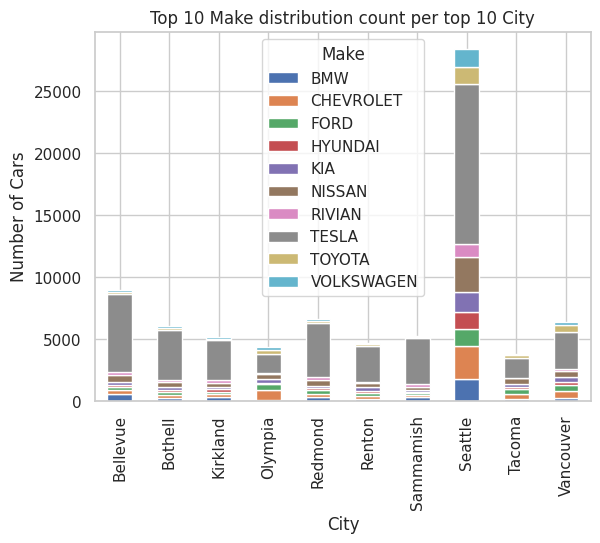

Make        BMW  CHEVROLET  FORD  HYUNDAI   KIA  NISSAN  RIVIAN  TESLA  \
City                                                                     
Bellevue    577        315   244      182   250     563     264   6207   
Bothell     274        245   236      159   247     408     178   4029   
Kirkland    353        256   174      166   190     316     239   3205   
Olympia     119        748   487      135   318     400      81   1559   
Redmond     344        259   272      178   199     493     191   4358   
Renton      180        266   253      155   331     299      99   2864   
Sammamish   327        154   172      100   128     292     191   3731   
Seattle    1810       2627  1423     1353  1606    2813    1068  12854   
Tacoma      174        443   359      142   285     435      71   1589   
Vancouver   251        615   425      248   382     550     117   2957   

Make       TOYOTA  VOLKSWAGEN  
City                           
Bellevue      224         144  
Bothell       144         127  
Kirkland      134         124  
Olympia       280         272  
Redmond       146         158  
Renton        143         116  
Sammamish      91         103  
Seattle      1418        1391  
Tacoma        203         128  
Vancouver     612         212

In [70]:
#Part 10-e
#the Top 10 Make distribution count per top 10 City
cnt_MkCity = df.groupby(['City', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_cty = cnt_MkCity.groupby(['City', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
city_counts = grouped_data_cty.groupby('City')['Count'].sum().reset_index()
make_counts = grouped_data_cty.groupby('Make')['Count'].sum().reset_index()

# Sort the counties by count in descending order, and select the top 10
top_cities = city_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)

# Filter the data to only include the top 10 counties
filtered_data_Cty = grouped_data_cty[grouped_data_cty['City'].isin(top_cities['City']) & grouped_data_cty['Make'].isin(top_makes['Make'])]

# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_cty = filtered_data_Cty.pivot(index='City', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_cty.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 City')
plt.xlabel('City')
plt.ylabel('Number of Cars')
# Show the plot
plt.show()

pivoted_data_cty.head(10)

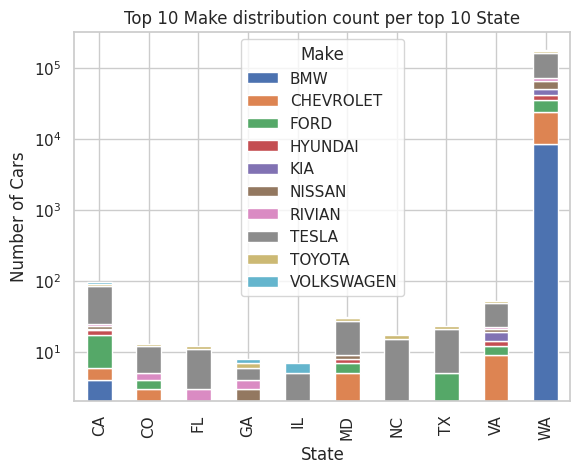

Make      BMW  CHEVROLET     FORD  HYUNDAI     KIA   NISSAN  RIVIAN    TESLA  \
State                                                                          
CA        4.0        2.0     11.0      3.0     1.0      2.0     2.0     60.0   
CO        2.0        1.0      1.0      0.0     0.0      0.0     1.0      7.0   
FL        0.0        1.0      0.0      0.0     1.0      0.0     1.0      8.0   
GA        0.0        0.0      2.0      0.0     0.0      1.0     1.0      2.0   
IL        0.0        0.0      0.0      0.0     0.0      0.0     0.0      5.0   
MD        2.0        3.0      2.0      1.0     0.0      1.0     0.0     18.0   
NC        0.0        1.0      0.0      0.0     0.0      0.0     0.0     14.0   
TX        0.0        2.0      3.0      0.0     0.0      0.0     0.0     16.0   
VA        1.0        8.0      3.0      2.0     5.0      2.0     1.0     27.0   
WA     8593.0    15392.0  11109.0   6060.0  9566.0  14711.0  5871.0  91158.0   

Make   TOYOTA  VOLKSWAGEN  
State                      
CA        6.0         5.0  
CO        1.0         0.0  
FL        1.0         0.0  
GA        1.0         1.0  
IL        0.0         2.0  
MD        3.0         1.0  
NC        2.0         0.0  
TX        2.0         0.0  
VA        3.0         0.0  
WA     8220.0      5771.0

In [71]:
#Part10-f
#the Top 10 Make distribution count per top 10 State?
cnt_Mk_St = df.groupby(['State', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_St = cnt_Mk_St.groupby(['State', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
st_counts = grouped_data_St.groupby('State')['Count'].sum().reset_index()
make_counts = grouped_data_St.groupby('Make')['Count'].sum().reset_index()

# Sort the counties by count in descending order, and select the top 10
top_States = st_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)
# Filter the data to only include the top 10 counties
filtered_data_St = grouped_data_St[grouped_data_St['State'].isin(top_States['State']) & grouped_data_St['Make'].isin(top_makes['Make'])]

# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_St = filtered_data_St.pivot(index='State', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_St.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 State')
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()

pivoted_data_St.head(10)


In [73]:
#Part 11-a
# Identifying trends: Model popularity over the years
#  by 'Model Year' and 'Model' to find how popular each model has been over time
popularity_over_time = df.groupby(['Model Year', 'Model']).size().unstack(fill_value=0)

# Displaying the first few rows of the pivot table
print(popularity_over_time.head())

Model       330E  500  500E  530E  740E  745E  745LE  750E  918  A3  A7 E  \
Model Year                                                                  
1999           0    0     0     0     0     0      0     0    0   0     0   
2000           0    0     0     0     0     0      0     0    0   0     0   
2002           0    0     0     0     0     0      0     0    0   0     0   
2003           0    0     0     0     0     0      0     0    0   0     0   
2008           0    0     0     0     0     0      0     0    0   0     0   

Model       A8 E  ACCORD  AIR  ARIYA  AVIATOR  B-CLASS  BENTAYGA  BLAZER EV  \
Model Year                                                                    
1999           0       0    0      0        0        0         0          0   
2000           0       0    0      0        0        0         0          0   
2002           0       0    0      0        0        0         0          0   
2003           0       0    0      0        0        0         0 

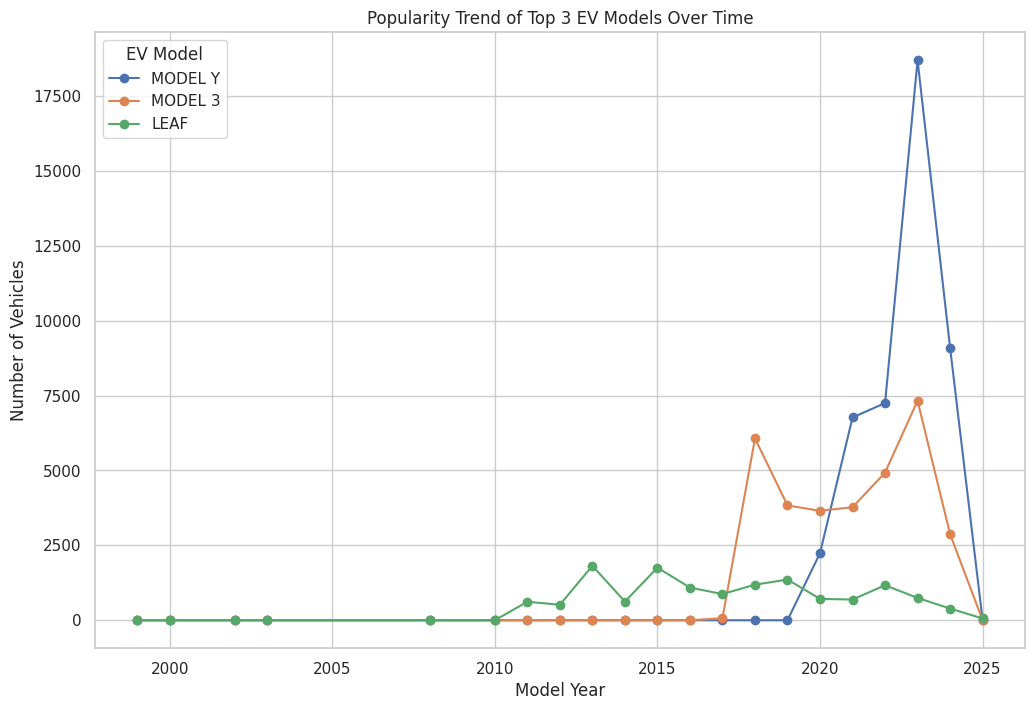

In [74]:
#Part11-b
# Plotting the trend for the top 3 most popular models over time
top_3_models = model_popularity.head(3).index  # Get the names of the top 3 models

plt.figure(figsize=(12,8))
for model in top_3_models:
    plt.plot(popularity_over_time.index, popularity_over_time[model], marker='o', label=model)

plt.title('Popularity Trend of Top 3 EV Models Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='EV Model')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Count')

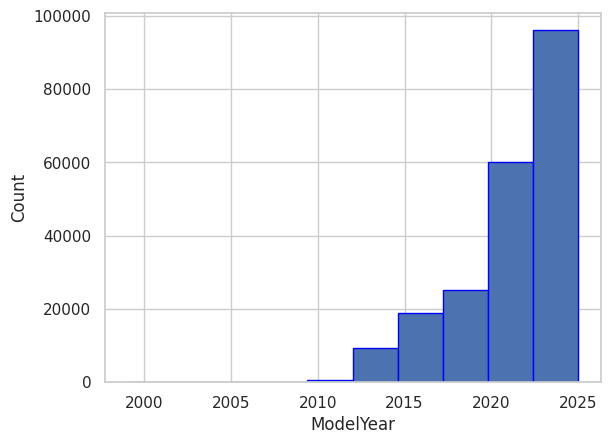

In [75]:
#Part11-c
# Create a histogram of the PostalCode variable
plt.hist(df["Model Year"], bins=10, edgecolor='blue')
plt.xlabel("ModelYear")
plt.ylabel("Count")

In [76]:
#Part 11 - d
#the Year Wise Cars sales growth?
# Year Wise Cars
year_wise_cars = df.groupby('Model Year')['VIN (1-10)'].count().reset_index()
year_wise_cars.columns = ['year','num_cars']

fig = ps.line(year_wise_cars,x="year", y="num_cars", title='Year Wise Number of Cars',markers=True)
fig.show()

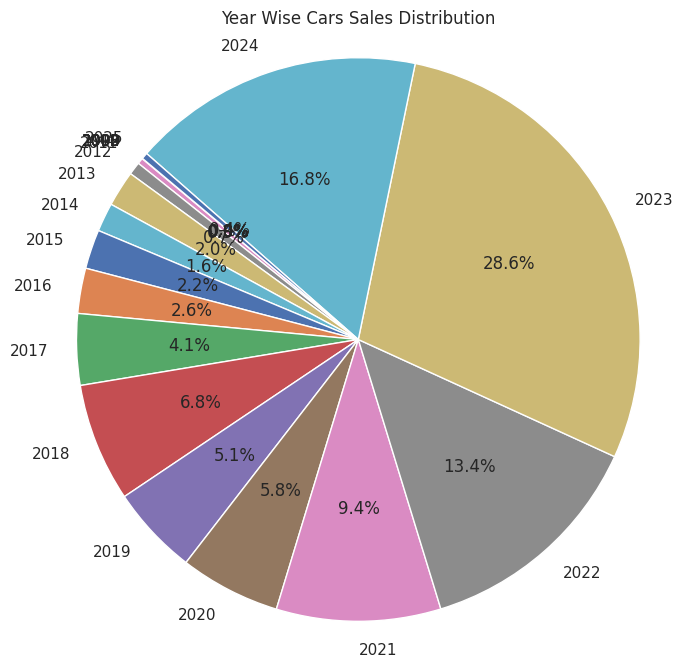

In [103]:
#Part11 -e
import matplotlib.pyplot as plt

# Part 11 - d: Year Wise Cars sales growth
# Year Wise Cars
year_wise_cars = df.groupby('Model Year')['VIN (1-10)'].count().reset_index()
year_wise_cars.columns = ['year', 'num_cars']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_wise_cars['num_cars'], labels=year_wise_cars['year'], autopct='%1.1f%%', startangle=140)
plt.title('Year Wise Cars Sales Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
